In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

%run -i XSectionAnalysis.py

In [64]:
file = uproot.open('../data/out1.root')
RMS_DF = file['RMS'].arrays(library='pandas')
S_AB_DF = file['S_AB'].arrays(library='pandas')

display(RMS_DF)
display(S_AB_DF)

,Nucleus,Nucleon,RMS,RMS_stderr
0,1,1,2.337611,0.000986
1,1,2,2.337942,0.000623
2,1,3,2.338213,0.001006
3,1,4,2.337812,0.001337
4,1,5,2.338052,0.001558
5,1,6,2.339289,0.000777
6,1,7,2.338624,0.000815
7,1,8,2.339367,0.000810
8,1,9,2.337837,0.001188
9,1,10,2.340437,0.001796


,b,S_AB,S_AB_stderr
0,0.050000,0.000038,7.601022e-07
1,0.150000,0.000041,1.190428e-06
2,0.250000,0.000046,1.321662e-06
3,0.350000,0.000057,1.469086e-06
4,0.450000,0.000066,2.941426e-06
...,...,...,...
195,19.549999,1.000000,0.000000e+00
196,19.650000,1.000000,0.000000e+00
197,19.750000,1.000000,0.000000e+00
198,19.850000,1.000000,0.000000e+00


In [70]:
b = np.array(S_AB_DF['b'])
S_AB = np.array(S_AB_DF['S_AB'])
S_AB_stderr = np.array(S_AB_DF['S_AB_stderr'])
RMS = np.array(RMS_DF['RMS'])
RMS_stderr = np.array(RMS_DF['RMS_stderr'])

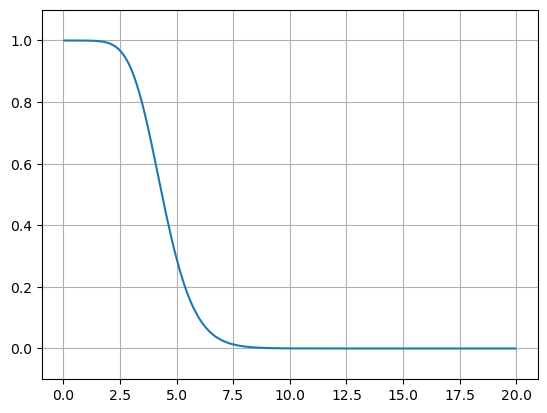

In [66]:
fig, ax = plt.subplots()

ax.plot(b, (1 - S_AB))

ax.grid()
ax.set_ylim(-0.1, 1.1)

plt.show()

In [67]:
10 * np.sqrt(np.sum(np.convolve((b * S_AB_stderr) ** 2, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid') / 2))

0.012179137926870944

In [68]:
sigma_tot = SigmaTot(b, S_AB, S_AB_stderr)

print('Total:', sigma_tot[0], "+/-", sigma_tot[1], "mb")

sigma_el = SigmaEl(b, S_AB, S_AB_stderr)

print('Elastic:', sigma_el[0], "+/-", sigma_el[1], "mb")

sigma_rxn = SigmaRxn(b, S_AB, S_AB_stderr)

print('Reaction:', sigma_rxn[0], "+/-", sigma_rxn[1], "mb")

Total: 1331.2473242208425 +/- 0.0027233382541733604 mb
Elastic: 476.09624094466466 +/- 0.001596802610035733 mb
Reaction: 855.1510978896974 +/- 0.002721350994757128 mb


In [97]:
rms_list = []
sigma_rxn_list = []

i = 0
while i < 20:
    file = uproot.open('../data/out' + str(i) + '.root')
    RMS_DF = file['RMS'].arrays(library='pandas')
    S_AB_DF = file['S_AB'].arrays(library='pandas')
    
    b = np.array(S_AB_DF['b'])
    S_AB = np.array(S_AB_DF['S_AB'])
    S_AB_stderr = np.array(S_AB_DF['S_AB_stderr'])
    RMS = np.array(RMS_DF['RMS'])
    RMS_stderr = np.array(RMS_DF['RMS_stderr'])
    
    sigma_rxn = SigmaRxn(b, S_AB, S_AB_stderr)[0]
    rms = np.mean(RMS)
    
    rms_list.append(rms)
    sigma_rxn_list.append(sigma_rxn)
    i += 1

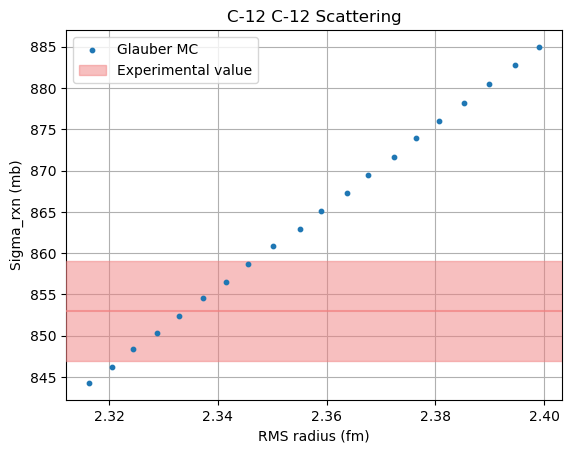

In [101]:
fig, ax = plt.subplots()

ax.scatter(rms_list, sigma_rxn_list, zorder = 10, s = 10, label='Glauber MC')

ax.grid()
ax.set_title('C-12 C-12 Scattering')
ax.set_ylabel('Sigma_rxn (mb)')
ax.set_xlabel('RMS radius (fm)')

ax.axhspan(853 - 6, 853 + 6, alpha=0.5, color='lightcoral', zorder=9, label='Experimental value')
ax.axhline(853, alpha=0.7, color='lightcoral', zorder=9)

ax.legend()

plt.show()